<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(2_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.4_n250.csv',
 'data_multi_delta_2.4_n120.csv',
 'data_multi_delta_2.4_n60.csv',
 'data_multi_delta_2.4_n30.csv',
 'data_multi_delta_2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.266279,49.846687,89.788729,-164.187208,39.714486,123.688225,-83.973739
1,0.0,1.0,79.278513,73.611907,35.879667,365.597156,564.367243,261.892671,302.474572
2,0.0,2.0,89.458052,81.226335,43.234374,78.289731,302.208492,282.339412,19.869080
3,0.0,3.0,22.100758,96.049180,73.842106,-322.416244,-120.424200,181.796721,-302.220921
4,0.0,4.0,90.533637,67.361013,34.370402,-249.631801,-47.366750,267.739061,-315.105811
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,55.512881,67.767928,47.014323,-72.626707,107.668425,181.200178,-73.531753
29996,999.0,26.0,95.432322,26.200930,86.304349,9.797548,227.735150,210.765967,16.969183
29997,999.0,27.0,42.790320,46.915556,39.261788,-40.240400,98.727264,110.111252,-11.383988
29998,999.0,28.0,55.499214,36.665307,60.157215,-169.971981,-7.650245,136.627991,-144.278236


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.266279,49.846687,89.788729,-164.187208,39.714486,123.688225,-83.973739
1,0.0,1.0,79.278513,73.611907,35.879667,365.597156,564.367243,261.892671,302.474572
2,0.0,2.0,89.458052,81.226335,43.234374,78.289731,302.208492,282.339412,19.869080
3,0.0,3.0,22.100758,96.049180,73.842106,-322.416244,-120.424200,181.796721,-302.220921
4,0.0,4.0,90.533637,67.361013,34.370402,-249.631801,-47.366750,267.739061,-315.105811
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,55.512881,67.767928,47.014323,-72.626707,107.668425,181.200178,-73.531753
29996,999.0,26.0,95.432322,26.200930,86.304349,9.797548,227.735150,210.765967,16.969183
29997,999.0,27.0,42.790320,46.915556,39.261788,-40.240400,98.727264,110.111252,-11.383988
29998,999.0,28.0,55.499214,36.665307,60.157215,-169.971981,-7.650245,136.627991,-144.278236


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    54.266279  49.846687  89.788729 -164.187208   39.714486   
      1.0    79.278513  73.611907  35.879667  365.597156  564.367243   
      2.0    89.458052  81.226335  43.234374   78.289731  302.208492   
      3.0    22.100758  96.049180  73.842106 -322.416244 -120.424200   
      4.0    90.533637  67.361013  34.370402 -249.631801  -47.366750   
...                ...        ...        ...         ...         ...   
999.0 25.0   55.512881  67.767928  47.014323  -72.626707  107.668425   
      26.0   95.432322  26.200930  86.304349    9.797548  227.735150   
      27.0   42.790320  46.915556  39.261788  -40.240400   98.727264   
      28.0   55.499214  36.665307  60.157215 -169.971981   -7.650245   
      29.0   48.461510  33.375414  37.275827  -37.732194   91.380556   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    123.688225  -83.973739  
      1.0    261.892671  302.474572  
      2.0    282.339412   19.869080  
      3.0    181.796721 -302.220921  
      4.0    267.739061 -315.105811  
...                 ...         ...  
999.0 25.0   181.200178  -73.531753  
      26.0   210.765967   16.969183  
      27.0   110.111252  -11.383988  
      28.0   136.627991 -144.278236  
      29.0    89.019529    2.361028  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    54.266279  49.846687  89.788729 -164.187208   39.714486   
      1.0    79.278513  73.611907  35.879667  365.597156  564.367243   
      2.0    89.458052  81.226335  43.234374   78.289731  302.208492   
      3.0    22.100758  96.049180  73.842106 -322.416244 -120.424200   
      4.0    90.533637  67.361013  34.370402 -249.631801  -47.366750   
...                ...        ...        ...         ...         ...   
999.0 25.0   55.512881  67.767928  47.014323  -72.626707  107.668425   
      26.0   95.432322  26.200930  86.304349    9.797548  227.735150   
      27.0   42.790320  46.915556  39.261788  -40.240400   98.727264   
      28.0   55.499214  36.665307  60.157215 -169.971981   -7.650245   
      29.0   48.461510  33.375414  37.275827  -37.732194   91.380556   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    123.688225  -83.973739  
      1.0    261.892671  302.474572  
      2.0    282.339412   19.869080  
      3.0    181.796721 -302.220921  
      4.0    267.739061 -315.105811  
...                 ...         ...  
999.0 25.0   181.200178  -73.531753  
      26.0   210.765967   16.969183  
      27.0   110.111252  -11.383988  
      28.0   136.627991 -144.278236  
      29.0    89.019529    2.361028  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.266279,49.846687,89.788729,-164.187208,39.714486,123.688225,-83.973739
1,0.0,1.0,79.278513,73.611907,35.879667,365.597156,564.367243,261.892671,302.474572
2,0.0,2.0,89.458052,81.226335,43.234374,78.289731,302.208492,282.339412,19.869080
3,0.0,3.0,22.100758,96.049180,73.842106,-322.416244,-120.424200,181.796721,-302.220921
4,0.0,4.0,90.533637,67.361013,34.370402,-249.631801,-47.366750,267.739061,-315.105811
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,55.512881,67.767928,47.014323,-72.626707,107.668425,181.200178,-73.531753
29996,999.0,26.0,95.432322,26.200930,86.304349,9.797548,227.735150,210.765967,16.969183
29997,999.0,27.0,42.790320,46.915556,39.261788,-40.240400,98.727264,110.111252,-11.383988
29998,999.0,28.0,55.499214,36.665307,60.157215,-169.971981,-7.650245,136.627991,-144.278236


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    54.266279  49.846687  89.788729 -164.187208   39.714486   
      1.0    79.278513  73.611907  35.879667  365.597156  564.367243   
      2.0    89.458052  81.226335  43.234374   78.289731  302.208492   
      3.0    22.100758  96.049180  73.842106 -322.416244 -120.424200   
      4.0    90.533637  67.361013  34.370402 -249.631801  -47.366750   
...                ...        ...        ...         ...         ...   
999.0 25.0   55.512881  67.767928  47.014323  -72.626707  107.668425   
      26.0   95.432322  26.200930  86.304349    9.797548  227.735150   
      27.0   42.790320  46.915556  39.261788  -40.240400   98.727264   
      28.0   55.499214  36.665307  60.157215 -169.971981   -7.650245   
      29.0   48.461510  33.375414  37.275827  -37.732194   91.380556   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    123.688225  -83.973739  
      1.0    261.892671  302.474572  
      2.0    282.339412   19.869080  
      3.0    181.796721 -302.220921  
      4.0    267.739061 -315.105811  
...                 ...         ...  
999.0 25.0   181.200178  -73.531753  
      26.0   210.765967   16.969183  
      27.0   110.111252  -11.383988  
      28.0   136.627991 -144.278236  
      29.0    89.019529    2.361028  

[30000 rows x 7 columns]

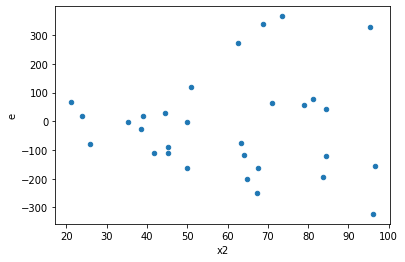

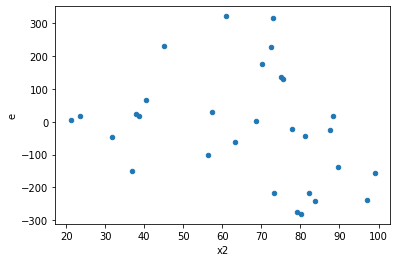

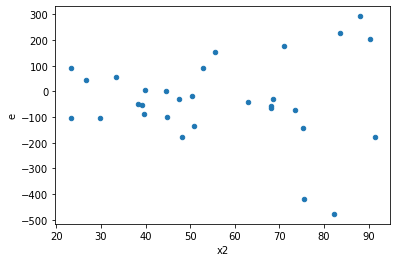

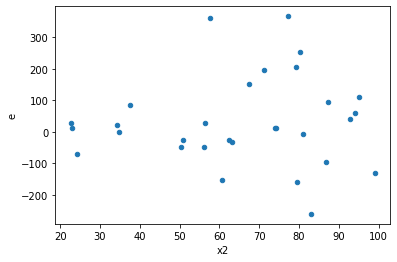

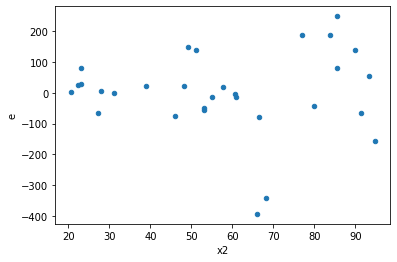

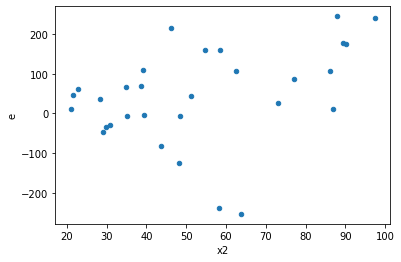

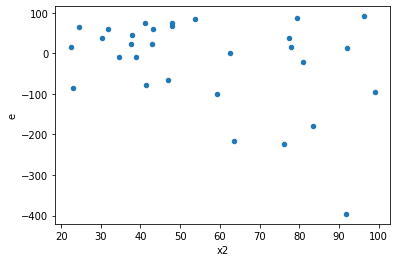

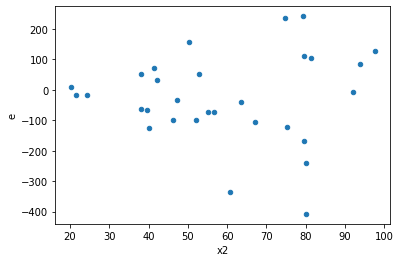

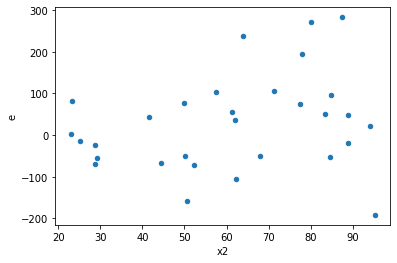

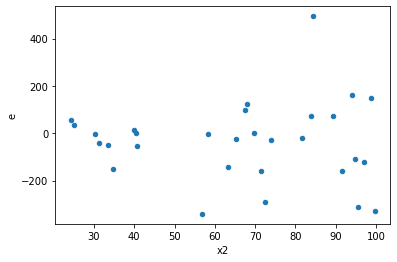

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,28687.51929534032,398260.64595376025,3187.502143926702,44251.18288375114,13.882714704385377,0.0005744496214905581,0.9997127751892547,0.00028722481074527906,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,138775.0223797298,143045.57713994247,15419.44693108109,15893.953015549163,1.0307732233580706,0.9647290411188987,0.5176354794405507,0.48236452055944934,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,153896.3868384196,264864.5767291523,17099.598537602178,29429.397414350256,1.721057798499464,0.43099171479485077,0.7845041426025746,0.21549585739742538,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,105174.0425701067,128946.50110018053,11686.004730011855,14327.38901113117,1.226029711791554,0.7664167375781403,0.6167916312109298,0.38320836878907016,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,31106.43855012909,177542.87353076335,3456.2709500143433,19726.985947862595,5.707592440859051,0.016070807294920275,0.9919645963525399,0.008035403647460138,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,56430.74314530939,293742.83019791765,6270.082571701043,32638.092244213072,5.205368808302395,0.021937920707928438,0.9890310396460358,0.010968960353964219,Reject001=1 : Homoscedasticity
9.0,9.0,9.0,75179.16227217446,507687.33695361775,8353.24025246383,56409.70410595753,6.75303264374794,0.0089293723183832,0.9955353138408084,0.0044646861591916,Reject001=0 : Heteroscedasticity
10.0,9.0,9.0,154877.7632590764,170494.43868565088,17208.6403621196,18943.826520627874,1.100832263444115,0.8885542709934904,0.5557228645032548,0.4442771354967452,Reject001=1 : Homoscedasticity
13.0,9.0,9.0,49201.68363342629,56769.079931756336,5466.853737047366,6307.675547972926,1.1538036046634177,0.8347273804965281,0.582636309751736,0.41736369024826403,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,28687.51929534032,398260.64595376025,3187.502143926702,44251.18288375114,13.882714704385377,0.0005744496214905581,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,162861.13744615437,128688.29059004397,18095.681938461596,14298.69895444933,0.7901718765324924,0.7314369891969836,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,138775.0223797298,143045.57713994247,15419.44693108109,15893.953015549163,1.0307732233580706,0.9647290411188987,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,153896.3868384196,264864.5767291523,17099.598537602178,29429.397414350256,1.721057798499464,0.43099171479485077,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,105174.0425701067,128946.50110018053,11686.004730011855,14327.38901113117,1.226029711791554,0.7664167375781403,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,31106.43855012909,177542.87353076335,3456.2709500143433,19726.985947862595,5.707592440859051,0.016070807294920275,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,158204.32573191746,46276.0961034817,17578.258414657495,5141.788455942411,0.2925084120765326,0.08135614195641365,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,56430.74314530939,293742.83019791765,6270.082571701043,32638.092244213072,5.205368808302395,0.021937920707928438,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,64738.665625599104,41630.08085422164,7193.1850695110115,4625.56453935796,0.6430481761082234,0.5210790908943524,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      835
Reject001=0 : Heteroscedasticity    165
Name: Result_test, dtype: int64